6팀

주제 : 심장병 예측 프로그램

선정이유 : 언제 어디서든 심장마비는 갑자기 찾아올수도있습니다. 그리고 일부의 심장마비가 온 사람들은 지병을 앓고있지않을 수도 있지만 대부분의 심장마비가 온사람들은 각자 지병을 가지고 있습니다. 그래서 나이와 성별, 혈압, 심전도 등을 가지고 심장마비가 올수있는 확률을 가지고 갑작스럽게 심장마비가 올수있는 상황을 대비하기 위해 만들게 되었습니다.

데이터 설명 :
kaggle에서 심장마비 환자의 데이터(나이, 성별, 혈압 등)를 제공받았다.

[데이터]
age 나이 
sex 성별 
chest pain type 가슴 통증 타입
resting blood pressure 혈압
serum cholestoral in mg/dl  혈청 콜레스테롤
fasting blood sugar > 120 mg/dl   공복 혈당
resting electrocardiographic results   심전도
maximum heart rate achieved   최대 심장박동 수
number of major vessels (0-3) colored by flourosopy   혈관의수

# 소스


   age  sex  cp  treshtbps  chol  ...  oldpeak  slope  ca  hsl  HeartDisease
0   63    1   3        145   233  ...      2.3      0   0    1             1
1   37    1   2        130   250  ...      3.5      0   0    2             1

[2 rows x 14 columns]
     age  sex  cp  treshtbps  chol  ...  oldpeak  slope  ca  hsl  HeartDisease
301   57    1   0        130   131  ...      1.2      1   1    3             0
302   57    0   1        130   236  ...      0.0      1   1    2             0

[2 rows x 14 columns]
              age         sex          cp  ...          ca         hsl  HeartDisease
count  303.000000  303.000000  303.000000  ...  303.000000  303.000000    303.000000
mean    54.366337    0.683168    0.966997  ...    0.729373    2.313531      0.544554
std      9.082101    0.466011    1.032052  ...    1.022606    0.612277      0.498835
min     29.000000    0.000000    0.000000  ...    0.000000    0.000000      0.000000
25%     47.500000    0.000000    0.000000  ...    0.000000   

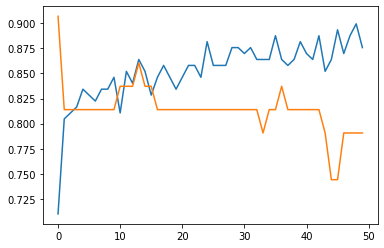

Keras DNN model loss :  0.1212824210524559
Keras DNN model accuracy :  0.8571428656578064
[[38  5]
 [ 8 40]] 

0.8571428571428571


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import xlrd

heading = ['age', 'sex', 'cp', 'treshtbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'hsl', 'HeartDisease']

raw_DB = pd.read_csv('/content/heart.csv', header=None, names=heading)
print(raw_DB.head(2))

print(raw_DB.tail(2))

print(raw_DB.describe())

print(raw_DB.info())

clean_DB = raw_DB.replace("?", np.nan)
clean_DB = clean_DB.dropna()
print(clean_DB.info())

keep = heading.pop()
print(keep)
print(heading)

Input = pd.DataFrame(clean_DB.iloc[:,0:13], columns=heading)
Target = pd.DataFrame(clean_DB.iloc[:,13], columns=[keep])
print(Input.head())
print(Target.head())

print(Target['HeartDisease'].sum())

print(Target['HeartDisease'].mean())

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_DB = scaler.fit_transform(Input)
scaled_DB = pd.DataFrame(scaled_DB, columns=heading)
print(scaled_DB.head())

print(scaled_DB.describe().T)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_DB, Target, test_size=0.30, random_state=5)

print('X_train shape : ', X_train.shape)
print('X_test shape : ', X_test.shape)
print('Y_train shape : ', Y_train.shape)
print('Y_test shape : ', Y_test.shape)

model = Sequential()
model.add(Dense(500, input_dim=13, activation='tanh'))
model.add(Dropout(0.3))
model.add(Dense(200, input_dim=13, activation='tanh'))
model.add(Dropout(0.3))
model.add(Dense(100, input_dim=13, activation='tanh'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid')) 
print(model.summary())

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
fit_hist = model.fit(X_train, Y_train, batch_size=50, 
epochs=50, validation_split=0.2, verbose=1)

plt.plot(fit_hist.history['accuracy'])
plt.plot(fit_hist.history['val_accuracy'])
plt.show()

score = model.evaluate(X_test, Y_test, verbose=0)
print('Keras DNN model loss : ', score[0])
print('Keras DNN model accuracy : ', score[1])

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
pred = model.predict(X_test)
pred = (pred > 0.5)
print(confusion_matrix(Y_test, pred), '\n')
print(f1_score(Y_test, pred, average='micro'))



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
